In [1]:

input_file = 'data/raw/qwen7b-deberta_calibration_data.csv'

output_prefix = 'qwen7b-calib-'

total_file = f"data/new/{output_prefix}total.csv"

percent_file = f"data/new/{output_prefix}percent.csv"

latex_file = f"data/new/{output_prefix}table.tex"

figure_path = f"data/new/Figure_3_qwen7b-calib.pdf"

In [2]:
import pandas as pd


# Read the CSV file
df = pd.read_csv(input_file)

# Define the bin columns (all columns except 'metric' and 'dataset')
bin_cols = df.columns[2:].tolist()

# Compute total related and total samples for each row
df['total_related'] = df[bin_cols].apply(lambda row: sum(int(x.split('|')[0]) for x in row if pd.notna(x)), axis=1)
df['total_samples'] = df[bin_cols].apply(lambda row: sum(int(x.split('|')[1]) for x in row if pd.notna(x)), axis=1)

# Add the '0.0-1.0' column in the format "total_related|total_samples"
df['0.0-1.0'] = df['total_related'].astype(str) + '|' + df['total_samples'].astype(str)

# Save the DataFrame with the new column to 'a.csv'
df.to_csv(total_file, index=False)
df

,metric,dataset,0.0-0.1,0.1-0.2,0.2-0.3,0.3-0.4,0.4-0.5,0.5-0.6,0.6-0.7,0.7-0.8,0.8-0.9,0.9-1.0,total_related,total_samples,0.0-1.0
0,cpe,nq,0|8,1|20,1|63,4|137,8|385,19|943,53|1533,167|4487,404|6749,2275|23646,2932,37971,2932|37971
1,cpe,hotpotqa,0|5,1|24,5|92,18|332,54|918,124|2469,331|5699,769|12606,1383|16876,7009|42433,9694,81454,9694|81454
2,cpe,dbpedia-entity,0|0,0|2,1|6,6|20,14|43,37|141,52|239,152|581,234|900,829|2467,1325,4399,1325|4399
3,cpe,fever,0|1,0|0,0|7,2|19,2|75,5|197,10|445,61|1045,122|2055,552|4856,754,8700,754|8700
4,cpe,all,0|14,2|46,7|168,30|508,78|1421,185|3750,446|7916,1149|18719,2143|26580,10665|73402,14705,132524,14705|132524
5,cnpe,nq,0|0,0|0,0|0,0|0,1|5,0|13,1|34,3|67,37|557,2890|37295,2932,37971,2932|37971
6,cnpe,hotpotqa,0|8,0|1,1|3,1|4,1|15,11|57,19|159,34|323,148|1280,9479|79604,9694,81454,9694|81454
7,cnpe,dbpedia-entity,0|1,2|2,0|0,0|0,4|6,1|1,0|2,2|11,26|86,1289|4290,1324,4399,1324|4399
8,cnpe,fever,0|1,0|0,0|0,0|0,0|1,0|0,0|2,0|8,8|100,746|8588,754,8700,754|8700
9,cnpe,all,0|10,2|3,1|3,1|4,6|27,12|71,20|197,39|409,219|2023,14404|129777,14704,132524,14704|132524


In [3]:
# Define a function to compute percentages
def compute_percentages(value, total_samples):
    if pd.isna(value):
        return value
    related, total = map(int, value.split('|'))
    # Calculate related percentage: (related / total) * 100, 0 if total is 0
    related_percentage = (related / total) * 100 if total > 0 else 0
    # Calculate bin percentage: (total / total_samples) * 100
    bin_percentage = (total / total_samples) * 100 if total_samples > 0 else 0
    return f"{related_percentage:.0f}|{bin_percentage:.0f}"

df = pd.read_csv(total_file)
# Transform all bin columns, including '0.0-1.0', to percentage format
for col in bin_cols + ['0.0-1.0']:
    df[col] = df.apply(lambda row: compute_percentages(row[col], row['total_samples']), axis=1)

# Drop the temporary columns used for calculations
df = df.drop(['total_related', 'total_samples'], axis=1)


df.to_csv(percent_file, index=False)
df

,metric,dataset,0.0-0.1,0.1-0.2,0.2-0.3,0.3-0.4,0.4-0.5,0.5-0.6,0.6-0.7,0.7-0.8,0.8-0.9,0.9-1.0,0.0-1.0
0,cpe,nq,0|0,5|0,2|0,3|0,2|1,2|2,3|4,4|12,6|18,10|62,8|100
1,cpe,hotpotqa,0|0,4|0,5|0,5|0,6|1,5|3,6|7,6|15,8|21,17|52,12|100
2,cpe,dbpedia-entity,0|0,0|0,17|0,30|0,33|1,26|3,22|5,26|13,26|20,34|56,30|100
3,cpe,fever,0|0,0|0,0|0,11|0,3|1,3|2,2|5,6|12,6|24,11|56,9|100
4,cpe,all,0|0,4|0,4|0,6|0,5|1,5|3,6|6,6|14,8|20,15|55,11|100
5,cnpe,nq,0|0,0|0,0|0,0|0,20|0,0|0,3|0,4|0,7|1,8|98,8|100
6,cnpe,hotpotqa,0|0,0|0,33|0,25|0,7|0,19|0,12|0,11|0,12|2,12|98,12|100
7,cnpe,dbpedia-entity,0|0,100|0,0|0,0|0,67|0,100|0,0|0,18|0,30|2,30|98,30|100
8,cnpe,fever,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,8|1,9|99,9|100
9,cnpe,all,0|0,67|0,33|0,25|0,22|0,17|0,10|0,10|0,11|2,11|98,11|100


In [4]:
import pandas as pd


df = pd.read_csv(percent_file)

# Replace '|' with '/' in data cells
df = df.applymap(lambda x: str(x).replace('|', '/') if isinstance(x, str) else x)

# Remove '0.0-1.0' column if it exists
if '0.0-1.0' in df.columns:
    df = df.drop('0.0-1.0', axis=1)


metric_replacements = {
    'cpe': 'Confidence using Predictive Entropy',
    'cnpe': 'Confidence using Length-Normalized Predictive Entropy',
    'cse': 'Confidence using Semantic Entropy',
    'cmscp': 'Confidence using Max Semantic Cluster Proportion',
    'mscp': 'Confidence using Max Semantic Cluster Proportion',
}
df['metric'] = df['metric'].replace(metric_replacements)


dataset_replacements = {
    'nq': 'NQ',
    'hotpotqa': 'Hotpot',
    'dbpedia-entity': 'DB-E',
    'fever': 'FEVER',
    'all': 'All'
}
df['dataset'] = df['dataset'].replace(dataset_replacements)


for col in df.columns[2:]:
    df[col] = df[col].apply(lambda x: x.replace('/', ' / '))


bin_cols = [col for col in df.columns if '-' in col]


metric_order = ['Confidence using Predictive Entropy', 'Confidence using Length-Normalized Predictive Entropy', 'Confidence using Semantic Entropy', 'Confidence using Max Semantic Cluster Proportion']


latex_table = [
    r'\begin{table}[h]',
    r'\centering',
    r'\resizebox{\textwidth}{!}{',
    r'\begin{tabular}{l' + 'c' * len(bin_cols) + '}',
    r'\hline',
    r'\multirow{2}{*}{Dataset} & \multicolumn{' + str(len(bin_cols)) + r'}{c}{Confidence Bins} \\',
    r'\cline{2-' + str(len(bin_cols) + 1) + r'}',
    r' & ' + ' & '.join(bin_cols) + r' \\',
    r'\hline'
]

for metric in metric_order:
    group = df[df['metric'] == metric]

    latex_table.append(r'\multicolumn{' + str(len(bin_cols) + 1) + r'}{c}{\textbf{' + metric + r'}} \\')
    latex_table.append(r'\hline')
    for index, row in group.iterrows():
        row_data = [row['dataset']] + [row[col] for col in bin_cols]
        latex_table.append(' & '.join(row_data) + r' \\')
    latex_table.append(r'\hline\hline')

latex_table.append(r'\end{tabular}')
latex_table.append(r'}')
latex_table.append(r'\end{table}')

final_latex_table = '\n'.join(latex_table)


print(final_latex_table)


with open(latex_file, "w") as f:
    f.write(final_latex_table)

\begin{table}[h]
\centering
\resizebox{\textwidth}{!}{
\begin{tabular}{lcccccccccc}
\hline
\multirow{2}{*}{Dataset} & \multicolumn{10}{c}{Confidence Bins} \\
\cline{2-11}
 & 0.0-0.1 & 0.1-0.2 & 0.2-0.3 & 0.3-0.4 & 0.4-0.5 & 0.5-0.6 & 0.6-0.7 & 0.7-0.8 & 0.8-0.9 & 0.9-1.0 \\
\hline
\multicolumn{11}{c}{\textbf{Confidence using Predictive Entropy}} \\
\hline
NQ & 0 / 0 & 5 / 0 & 2 / 0 & 3 / 0 & 2 / 1 & 2 / 2 & 3 / 4 & 4 / 12 & 6 / 18 & 10 / 62 \\
Hotpot & 0 / 0 & 4 / 0 & 5 / 0 & 5 / 0 & 6 / 1 & 5 / 3 & 6 / 7 & 6 / 15 & 8 / 21 & 17 / 52 \\
DB-E & 0 / 0 & 0 / 0 & 17 / 0 & 30 / 0 & 33 / 1 & 26 / 3 & 22 / 5 & 26 / 13 & 26 / 20 & 34 / 56 \\
FEVER & 0 / 0 & 0 / 0 & 0 / 0 & 11 / 0 & 3 / 1 & 3 / 2 & 2 / 5 & 6 / 12 & 6 / 24 & 11 / 56 \\
All & 0 / 0 & 4 / 0 & 4 / 0 & 6 / 0 & 5 / 1 & 5 / 3 & 6 / 6 & 6 / 14 & 8 / 20 & 15 / 55 \\
\hline\hline
\multicolumn{11}{c}{\textbf{Confidence using Length-Normalized Predictive Entropy}} \\
\hline
NQ & 0 / 0 & 0 / 0 & 0 / 0 & 0 / 0 & 20 / 0 & 0 / 0 & 3 / 0 & 4 / 0

/var/folders/8s/xt2dtpb54pn2cgl2s5hcd5vm0000gn/T/ipykernel_53146/2876151528.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace('|', '/') if isinstance(x, str) else x)


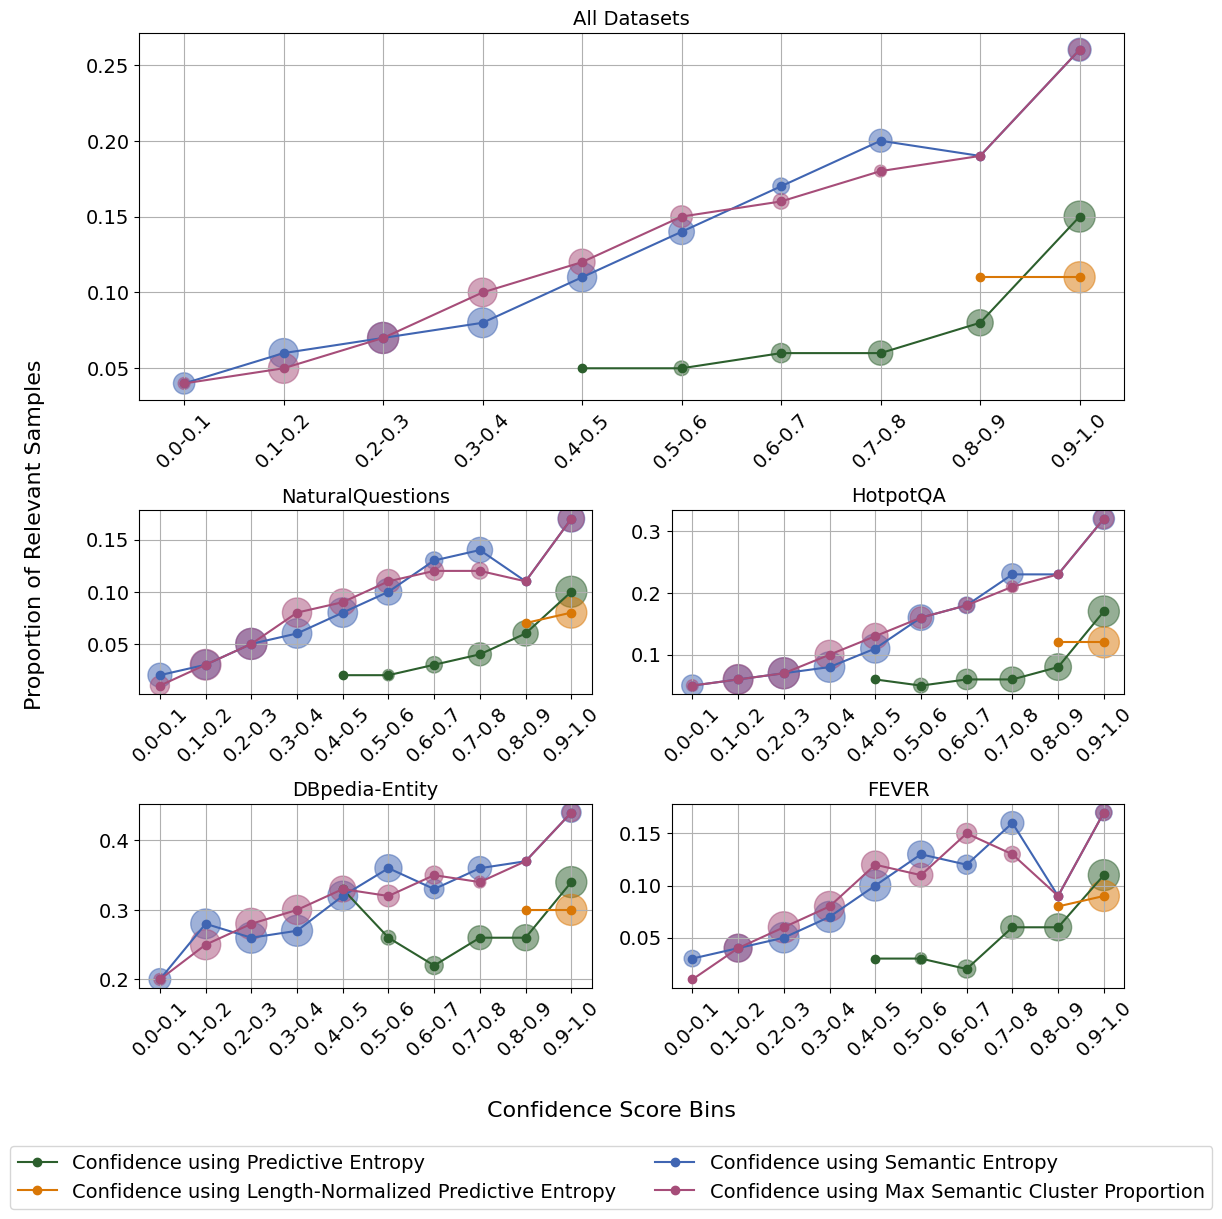

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# mapping for colors and labels
color_mapping = {
    'cpe': '#2C5F2D',   # dark pine green
    'cnpe': '#D97706',  # warm amber
    'cse': '#4065B2',   # deep sea blue
    'mscp': '#A64D79',  # soft magenta
}

label_mapping = {
    'cpe': 'Confidence using Predictive Entropy',
    'cnpe': 'Confidence using Length-Normalized Predictive Entropy',
    'cse': 'Confidence using Semantic Entropy',
    'mscp': 'Confidence using Max Semantic Cluster Proportion',
}

new_dataset_mapping = {
    'nq': 'NaturalQuestions',
    'dbpedia-entity': 'DBpedia-Entity',
    'fever': 'FEVER',
    'hotpotqa': 'HotpotQA',
    'all': 'All Datasets',
}


bin_labels = [f'{i/10:.1f}-{(i+1)/10:.1f}' for i in range(10)]


df = pd.read_csv(percent_file)

def plot_calibration_curve(ax, df, dataset_name):
    df_dataset = df[df['dataset'] == dataset_name]
    min_size = 10
    max_size = 500
    
    for metric in ['cpe', 'cnpe', 'cse', 'mscp']:
        row = df_dataset[df_dataset['metric'] == metric].iloc[0]
        bin_data = []
        
        for bin_label in bin_labels:
            value = row[bin_label]
            relevant_str, bin_str = value.split('|')
            relevant = float(relevant_str) / 100
            bin_pct = float(bin_str)
            if bin_pct > 0:
                bin_data.append((bin_label, relevant, bin_pct))
        
        if bin_data:
            bin_labels_metric, relevant_percentages, bin_percentages = zip(*bin_data)
            x_positions = [bin_labels.index(label) for label in bin_labels_metric]
            
            log_bin_sizes = np.log(np.array(bin_percentages) + 1)
            if log_bin_sizes.max() > log_bin_sizes.min():
                normalized_sizes = min_size + (max_size - min_size) * \
                    (log_bin_sizes - log_bin_sizes.min()) / (log_bin_sizes.max() - log_bin_sizes.min())
            else:
                normalized_sizes = [min_size] * len(bin_percentages)
            
            ax.plot(x_positions, relevant_percentages, marker='o', linestyle='-', 
                   color=color_mapping[metric], label=label_mapping[metric])
            ax.scatter(x_positions, relevant_percentages, s=normalized_sizes, 
                      color=color_mapping[metric], alpha=0.5)
    
    ax.set_title(new_dataset_mapping[dataset_name], fontsize=14)
    ax.set_xticks(range(len(bin_labels)))
    ax.set_xticklabels(bin_labels, rotation=45, fontsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(True)
    return ax


fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(3, 2, height_ratios=[2, 1, 1], width_ratios=[1, 1])

# Darw "All Datasets"
big_ax = fig.add_subplot(gs[0, :])
plot_calibration_curve(big_ax, df, 'all')

# Draw individual datasets
individual_datasets = ['nq', 'hotpotqa', 'dbpedia-entity', 'fever']
for i, dataset_name in enumerate(individual_datasets):
    row = (i // 2) + 1
    col = i % 2
    ax = fig.add_subplot(gs[row, col])
    plot_calibration_curve(ax, df, dataset_name)

# remove x and y labels from all axes
for ax in fig.axes:
    ax.set_xlabel('')
    ax.set_ylabel('')

# add shared x-axis label
fig.text(0.5, 0.02, 'Confidence Score Bins', ha='center', va='center', fontsize=16)

# add shared y-axis label
fig.text(0.02, 0.5, 'Proportion of Relevant Samples', ha='center', va='center', rotation='vertical', fontsize=16)

# add legend to the big_ax
handles, labels = big_ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.07), fontsize=14)

# adjust layout to make room for the legend
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.savefig(figure_path, bbox_inches='tight')
plt.show()